In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("https://raw.github.com/sebaskbu/ProtectoCasas/blob/main/proyecto/basededatos/data.csv")

In [ ]:
data['yr_built'] = pd.to_datetime(data['yr_built'], format='%Y').dt.year

In [ ]:
data[['id','yr_built']].groupby('yr_built').count().reset_index().rename(columns = {'yr_built':'Año de Construcción','id':'Número de casas construidas'})

In [ ]:
import seaborn as sns

In [ ]:
df = data[['sqft_living','yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(x= 'yr_built', y='sqft_living', data = df)

In [3]:
print('Cantidad de datos:')
print(data.shape)

Cantidad de datos:
(21613, 21)


In [5]:
print('Tipos de datos:')
print(data.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  flo

In [9]:
data_f= data.dropna()

In [10]:
print('Datos faltantes:')
print(pd.isnull(data).sum())

Datos faltantes:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [11]:
print('Estadísticas del dataset:')
print(data.describe())

Estadísticas del dataset:
                 id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21613.00   21613.00  21613.00   21613.00     21613.00   21613.00   
mean  4580301520.86  540088.14      3.37       2.11      2079.90   15106.97   
std   2876565571.31  367127.20      0.93       0.77       918.44   41420.51   
min      1000102.00   75000.00      0.00       0.00       290.00     520.00   
25%   2123049194.00  321950.00      3.00       1.75      1427.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900445.00  645000.00      4.00       2.50      2550.00   10688.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  waterfront     view  condition    grade  sqft_above  \
count 21613.00    21613.00 21613.00   21613.00 21613.00    21613.00   
mean      1.49        0.01     0.23       3.41     7.66     1788.39   
std       0.54        0.09     0.77       0.65   

In [12]:
X = np.array(data.drop(['price', 'date'], axis=1))
y = np.array(data['price'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
prediccion = pd.DataFrame({'prediccion':Y_pred,'Actual':y_test})
print('Prediciion:')
print(logreg.score(X_test,y_test)*100)

c:\Users\jscs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediciion:
0.8558871154291001


In [ ]:
ids = data['id']
###Regresión logística
prediccion_logreg = logreg.predict(data.drop('id', axis=1))
out_logreg = pd.DataFrame({ 'id' : ids, 'price': prediccion_logreg })
print('Predicción Regresión Logística:')
print(out_logreg.head())
##Support Vector Machines
prediccion_svc = svc.predict(data.drop('id', axis=1))
out_svc = pd.DataFrame({ 'id' : ids, 'price': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(out_svc.head())
##K neighbors
prediccion_knn = knn.predict(data.drop('id', axis=1))
out_knn = pd.DataFrame({ 'id' : ids, 'price': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
print(out_knn.head())

In [19]:
import tensorflow as tf
import time
import math

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(124,input_shape=(15,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [21]:
model.compile(loss='error_medio_cuadrado',
        optimizer=tf.keras.optimizers.Adam(0.1),
        metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               1984      
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 2,109
Trainable params: 2,109
Non-trainable params: 0
_________________________________________________________________


In [26]:
historial = logreg.fit(X_train, y_train, epochs = 1000, verbose=0)

TypeError: LogisticRegression.fit() got an unexpected keyword argument 'epochs'

NameError: name 'historial' is not defined

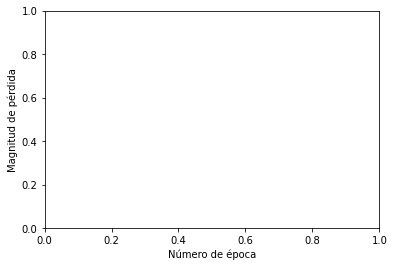

In [25]:
import matplotlib.pyplot as plt
plt.xlabel('Número de época')
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])